# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [52]:
# Code Here
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins

In [53]:
penguins = load_penguins()
penguins = pd.DataFrame(penguins)
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [54]:
# Code Here
y = penguins['bill_depth_mm']
x = penguins['bill_length_mm']

x = np.array(x)
x = x.reshape(-1,1)

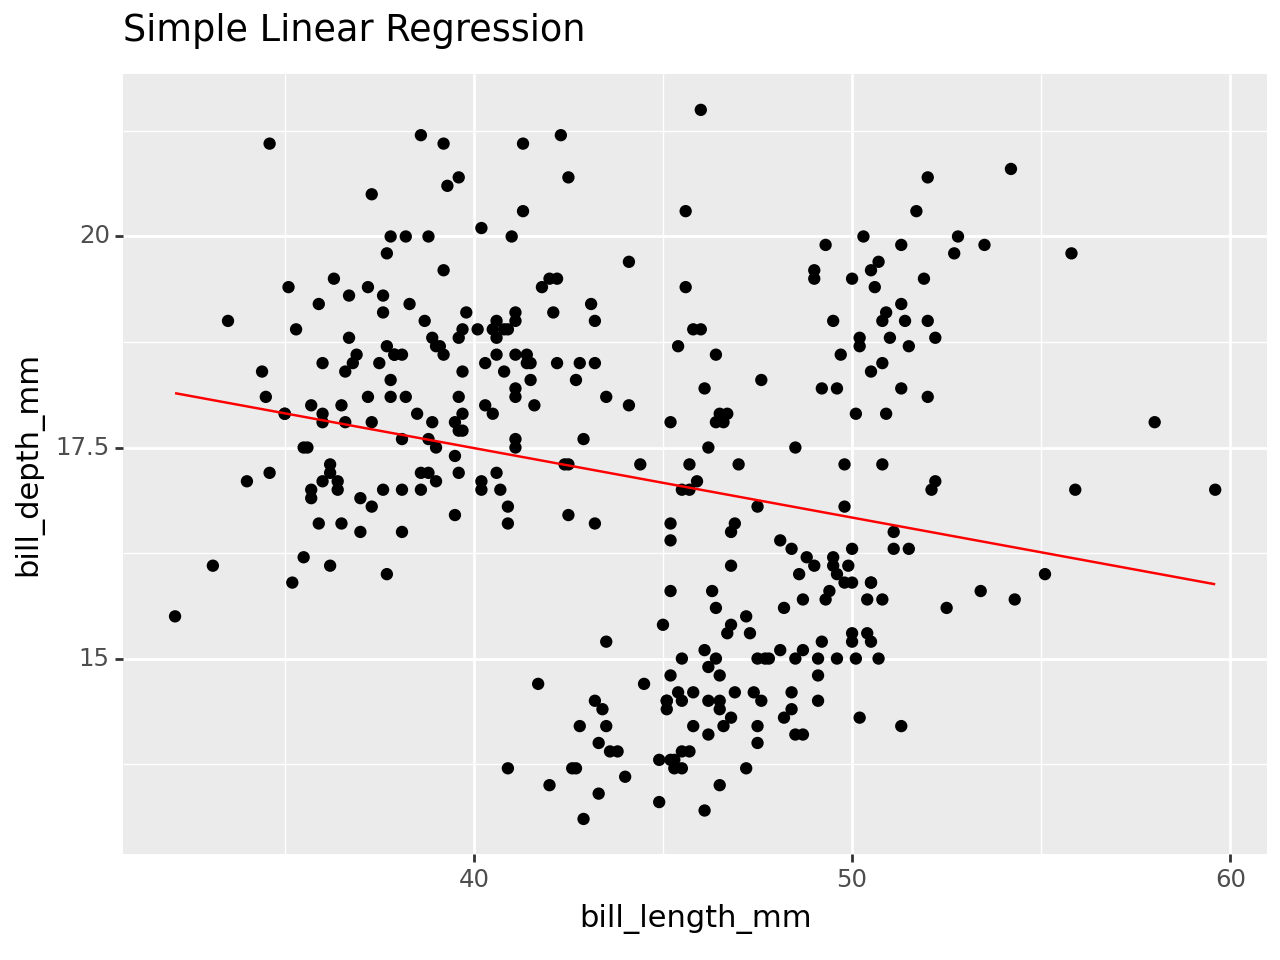

<Figure Size: (640 x 480)>

In [55]:
#SLR
lr = LinearRegression()

lr_fit = lr.fit(x,y)

y_pred_lr = lr_fit.predict(x)

data = {
    'y':y,
    'x':x.flatten()
}
df = pd.DataFrame(data)

(ggplot(df, aes(x = "x", y = "y"))
       + geom_point()
       + geom_line(aes(y = y_pred_lr), color = 'red')
       + labs(x = 'bill_length_mm', y = 'bill_depth_mm', title = 'Simple Linear Regression')
       )


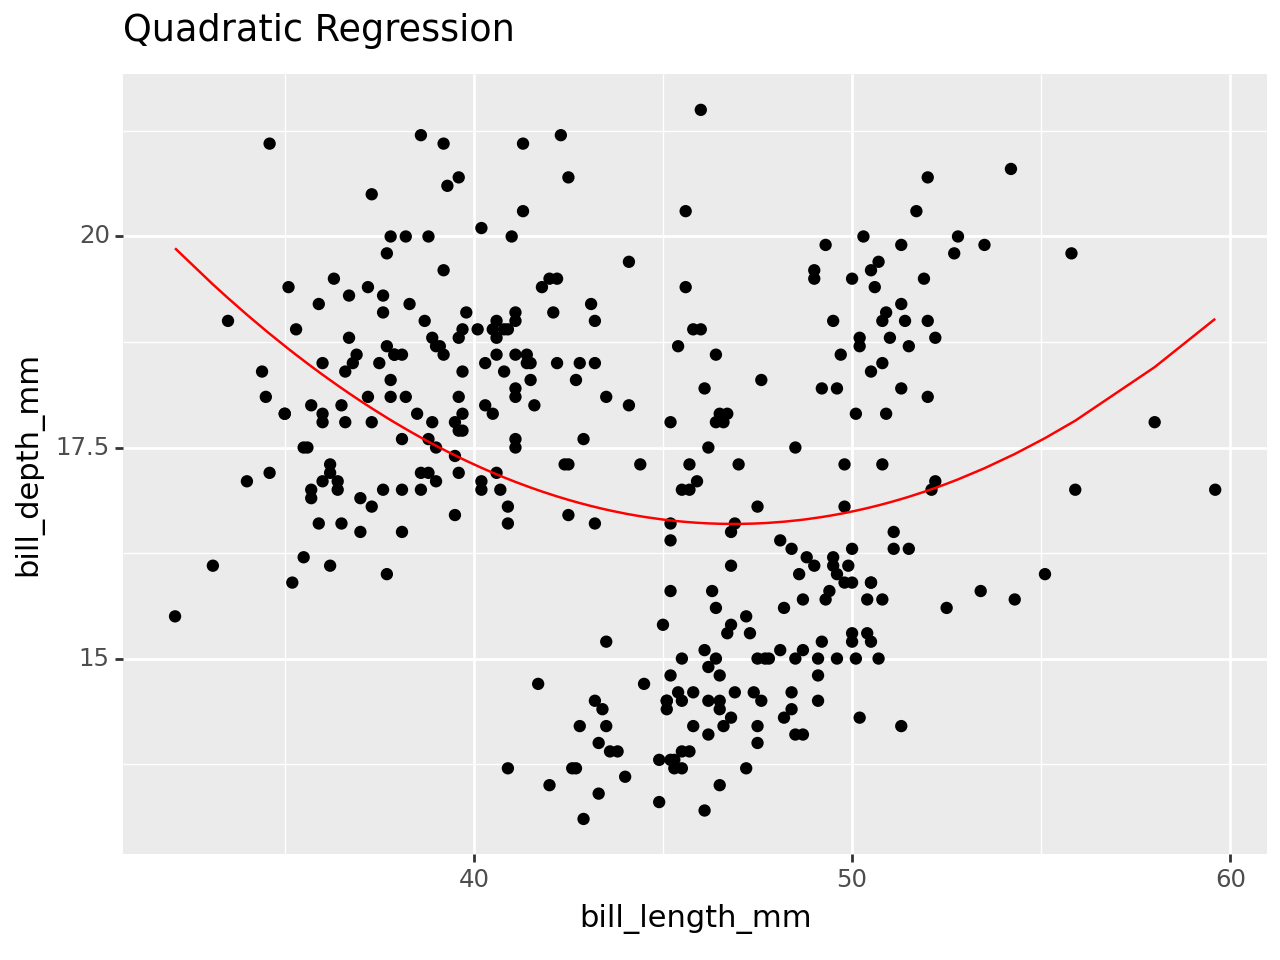

<Figure Size: (640 x 480)>

In [71]:
#Quadratic Model
x = penguins['bill_length_mm'].values.reshape(-1, 1)  
y = penguins['bill_depth_mm']

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

lr = LinearRegression()
lr_fit = lr.fit(x_poly, y)

y_pred_lr = lr_fit.predict(x_poly)

data = {
    'y':y,
    'x':x.flatten()
}
df = pd.DataFrame(data)

(ggplot(df, aes(x = "x", y = "y"))
       + geom_point()
       + geom_line(aes(y = y_pred_lr), color = 'red')
       + labs(x = 'bill_length_mm', y = 'bill_depth_mm', title = 'Quadratic Regression')
       )

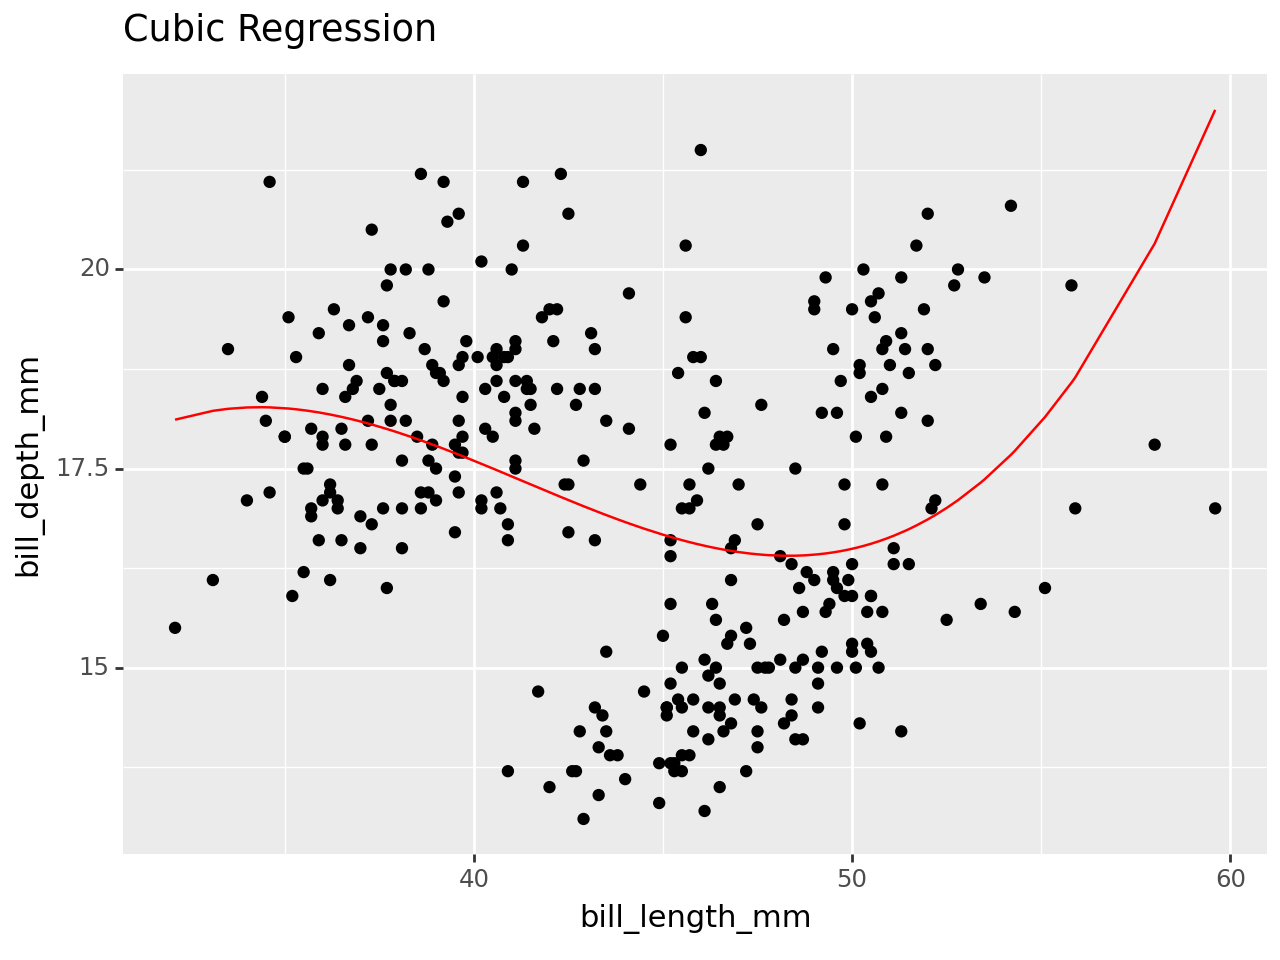

<Figure Size: (640 x 480)>

In [72]:
#Cubic Model
x = penguins['bill_length_mm'].values.reshape(-1, 1)  
y = penguins['bill_depth_mm']

poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)

lr = LinearRegression()
lr_fit = lr.fit(x_poly, y)

y_pred_lr = lr_fit.predict(x_poly)

data = {
    'y':y,
    'x':x.flatten()
}
df = pd.DataFrame(data)

(ggplot(df, aes(x = "x", y = "y"))
       + geom_point()
       + geom_line(aes(y = y_pred_lr), color = 'red')
       + labs(x = 'bill_length_mm', y = 'bill_depth_mm', title = 'Cubic Regression')
       )

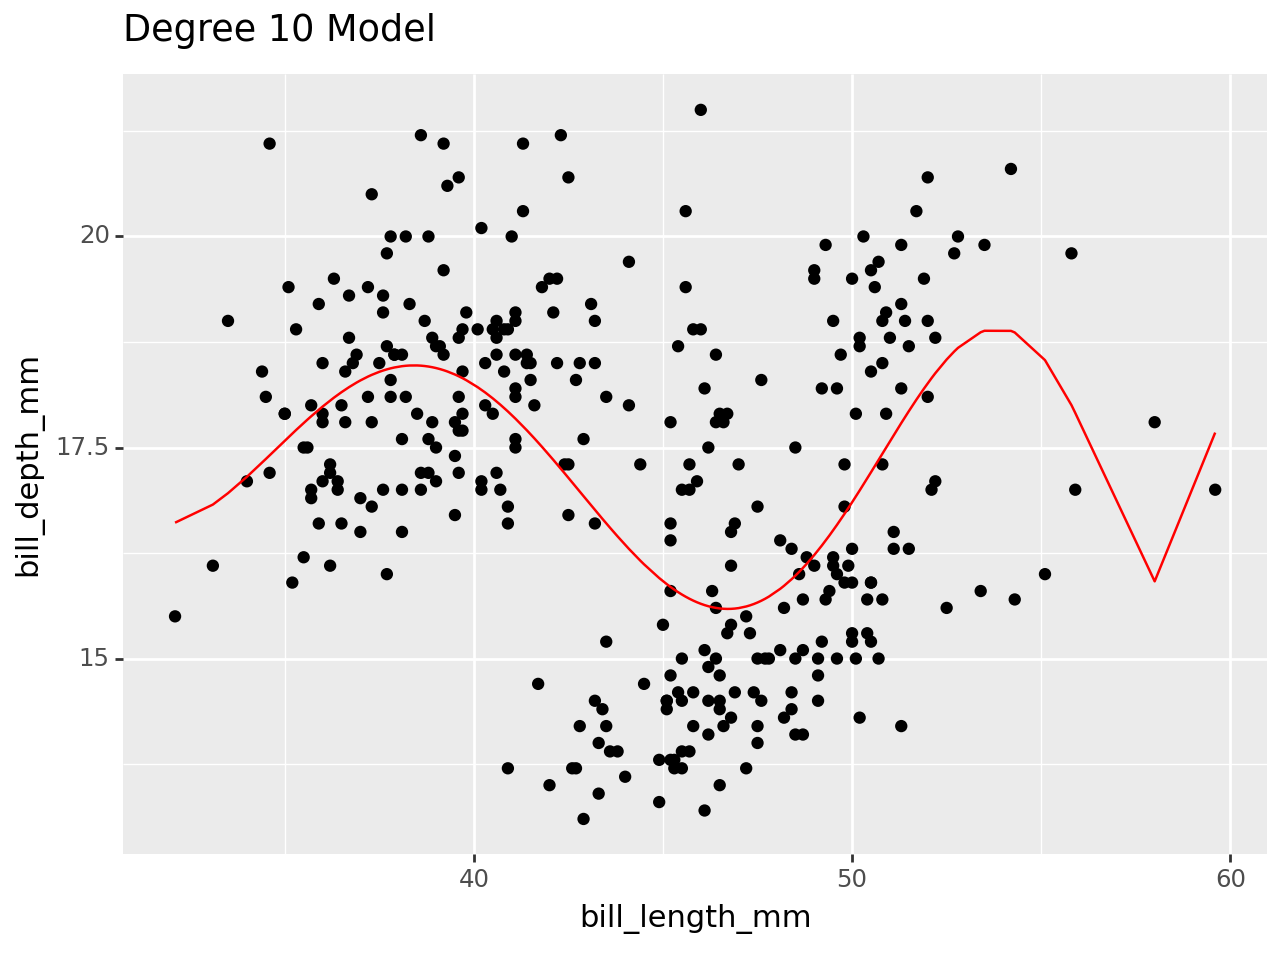

<Figure Size: (640 x 480)>

In [74]:
#Degree 10 Model
x = penguins['bill_length_mm'].values.reshape(-1, 1)  
y = penguins['bill_depth_mm']

poly = PolynomialFeatures(degree=10, include_bias=False)
x_poly = poly.fit_transform(x)

lr = LinearRegression()
lr_fit = lr.fit(x_poly, y)

y_pred_lr = lr_fit.predict(x_poly)

data = {
    'y':y,
    'x':x.flatten()
}
df = pd.DataFrame(data)

(ggplot(df, aes(x = "x", y = "y"))
       + geom_point()
       + geom_line(aes(y = y_pred_lr), color = 'red')
       + labs(x = 'bill_length_mm', y = 'bill_depth_mm', title = 'Degree 10 Model')
       )

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Based on the above plots, models 1 and 2 seem to be underfitting the data. The data seems to have a trend of at least 2 main sign changes which the SLR and the polynomial models do not capture. The degree 10 model seems to be overfitting the data by capuring every small fluctuation in the data. This creates a good fit for the sample data but may not perform well in different random sample. The cubic model seems to be the best for the data compared to the others by capuring the main trends while not overfitting the data.